### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

importing Jupyter notebook from kmeans.ipynb
importing Jupyter notebook from kmeanspp.ipynb
[array([5, 5]), array([-2, -2]), array([1, 1])]
[[ 0.8  1.   2. ]
 [ 0.8 -1.   1. ]
 [-1.   1.2  0. ]
 [ 1.  -1.2  1. ]
 [-0.8 -1.   3. ]
 [ 1.   0.8  2. ]
 [-1.  -1.2  3. ]
 [ 1.   1.2  2. ]
 [ 1.  -0.8  1. ]
 [ 1.   1.   2. ]
 [ 1.  -1.   1. ]
 [-1.   0.8  0. ]
 [-1.  -0.8  3. ]
 [-1.  -1.   3. ]
 [-0.8  1.   0. ]
 [-1.   1.   0. ]]
[array([-0.95,  1.  ]), array([ 0.95, -1.  ]), array([0.95, 1.  ]), array([-0.95, -1.  ])]


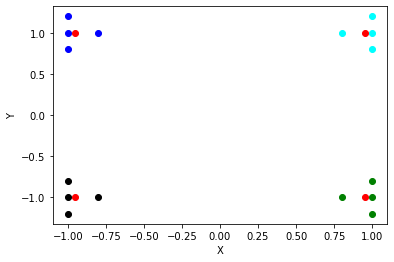

[[1.78500000e+04 0.00000000e+00 0.00000000e+00 ... 3.40000000e+01
  1.54285217e+02 0.00000000e+00]
 [1.30470000e+04 0.00000000e+00 0.00000000e+00 ... 1.00000000e+01
  2.94838095e+02 0.00000000e+00]
 [1.25830000e+04 0.00000000e+00 0.00000000e+00 ... 1.50000000e+01
  4.63699355e+02 0.00000000e+00]
 ...
 [1.32980000e+04 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  2.40000000e+02 0.00000000e+00]
 [1.45690000e+04 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.51593333e+02 0.00000000e+00]
 [1.27130000e+04 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  5.65700000e+02 0.00000000e+00]]
[array([1.53107281e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.17278552e+03, 1.24295242e+02,
       4.71210102e+02, 3.57871029e+00, 2.71865491e+02]), array([1.63740000e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.69607960e+05, 0.00000000e+00,
       2.12419600e+04, 6.75000000e+01, 3.99730969e+03]), a

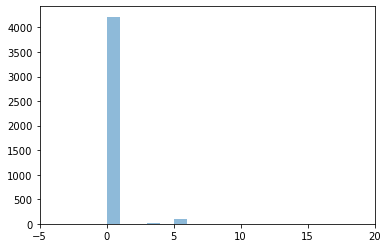

0.0    4218
5.0     102
3.0      13
2.0       3
1.0       2
4.0       1
dtype: int64


In [2]:
from kmeans import kmeans
from kmeanspp import compute_distance

## K-Means Testing

### Calculate Inertia

In [3]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Inertia
def calculate_inertia(centers, clustered_data):
    inertia = 0
    num_rows = clustered_data.shape[0]
    for i in range(num_rows):
        cluster_index = int(clustered_data[i][-1])
        center = centers[cluster_index]
        point = clustered_data[i][:-1]
        inertia += compute_distance(point, center)
    return inertia


### Calculate Dunn Index

In [4]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Dunn Index
def calculate_dunn_index(centers):
    if len(centers) < 2:
        return 1
    dist = []
    num_centers = len(centers)
    for i in range(num_centers):
        for j in range(i+1, num_centers):
            dist.append(compute_distance(centers[i], centers[j]))
    min_dist = dist[0]
    max_dist = dist[0]
    for i in range(1, len(dist)):
        min_dist = min(min_dist, dist[i])
        max_dist = max(max_dist, dist[i])
    return min_dist / max_dist

### Plot Inertia and Dunn Index vs K

In [5]:
def plotGraphs(data, maxK = 10):
    inertias = []
    dunn_indices = []
    Ks = range(1, maxK + 1)
    for i in range(1, maxK + 1):
        clustered_data, centers = kmeans(i, data)
        inertia = calculate_inertia(centers, clustered_data)
        dunn_index = calculate_dunn_index(centers)
        inertias.append(inertia)
        dunn_indices.append(dunn_index)
        print(inertia)
        print(dunn_index)
    plt.plot(Ks, inertias)
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.show()
    plt.plot(Ks, dunn_indices)
    plt.xlabel("K")
    plt.ylabel("Dunn Index")
    plt.show()

In [18]:
df_products = pd.read_csv("df_products.csv",encoding="latin1")
df_products_inp = df_products.drop(["StockCode","Description",df_products.columns[0]],axis=1)
df_products_np = df_products_inp.to_numpy()
df_products_inp.columns

Index(['root-1', 'root-2', 'root-3', 'root-4', 'root-5', 'root-6', 'root-7',
       'root-8', 'root-9', 'root-10',
       ...
       'root-182', 'root-183', 'root-184', 'root-185', 'priceRange-1',
       'priceRange-2', 'priceRange-3', 'priceRange-4', 'priceRange-5',
       'priceRange-6'],
      dtype='object', length=191)

In [ ]:
df_products_inp = df_products.drop(["CustomerID",df_products.columns[0]],axis=1)
df_products_inp

In [20]:
df_products_np = df_products_inp.to_numpy()
print(df_products_np)

[[1 1 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


9152.847476125464
1
9041.874138202887
1.0
8400.314616430165
0.6654901696709178
7600.169226240195
0.3730968758017211
8210.032188415507
0.21127902242221994
8238.829367526354
0.18673792009531817
6849.220816600461
0.2739764523047154
7262.0410526844225
0.23992012898636722
6835.606388682105
0.15029171492259955
7150.744891356392
0.18003563371858317


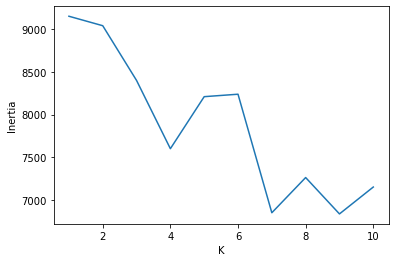

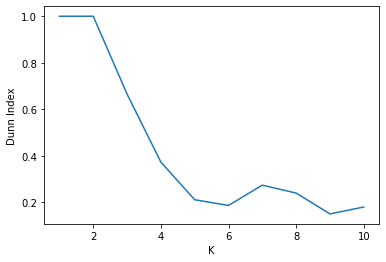

In [21]:
plotGraphs(df_products_np,10)

Optimal number of product categories = 5

In [27]:
df_phase9 = pd.read_csv("df_phase9.csv",encoding="latin1")
df_phase9_inp = df_phase9.drop(["CustomerID","CountryID",df_phase9.columns[0]],axis=1)
df_phase9_np = df_phase9_inp.to_numpy()
df_phase9_inp.columns

Index(['Category-0', 'Category-1', 'Category-2', 'Category-3', 'Category-4',
       'Total Expenditure', 'Min Expenditure', 'Max Expenditure',
       'No. of Invoices', 'Mean Expenditure'],
      dtype='object')

311361299563.0975
1
108836100865.1144
1.0
53852921484.225655
0.07882622071961187
35380403128.38589
0.02477657999603453
30565720937.545303
0.02294789913904302
18789470764.127296
0.0026082015814101636
18441792129.143528
0.0026082015814101636
18237652740.479958
0.002425681966749548
10137559367.706266
0.00047565744746958785
9933419979.042698
0.00044240402628494127


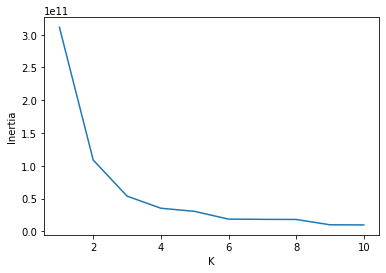

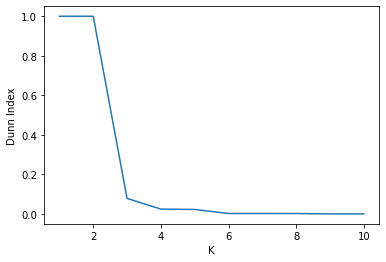

In [28]:
plotGraphs(df_phase9_np,10)